Consider the dataset given below to predict the target variable(auto price) 
using other independent variables .  Identify and apply suitable ML model for 
the prediction with appropriate justification for each stages(selecting models,
accuracy and interpretation etc)

# 21MIS1006 Fadilah

In [1]:
## Importing required Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the Data 
dataset = pd.read_csv("/home/ex5/21MIS1006/auto_price.csv")
dataset.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,target
0,5,164,99.800003,176.600006,66.199997,54.299999,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,5,164,99.400002,176.600006,66.400002,54.299999,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,4,158,105.800003,192.699997,71.400002,55.700001,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,4,158,105.800003,192.699997,71.400002,55.900002,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,5,192,101.199997,176.800003,64.800003,54.299999,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    int64  
 12  peak-rpm           159 non-null    int64  
 13  city-mpg           159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  target             159 non-null    int64  
dtypes: float64(7), int64(9)
me

In [13]:
#processing the data to fill the missing data 
dataset.isnull().sum()

# from the below you can the infer the dataset has no missing values
#dataset is proper

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
target               0
dtype: int64

In [20]:
# We can find our correlation values for two variables with
#We would define a strong correlation when the Correlation Coefficient is 
#around 1 or -1, and the P-Value is less than 0.001

from scipy import stats
print("Correlation for wheel-base and target")
pearson_coef, p_value = stats.pearsonr(dataset['wheel-base'], dataset['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#its a positive correlation

Correlation for wheel-base and target
The Pearson Correlation Coefficient is 0.7344189116137317  with a P-value of P = 3.2219387729731234e-28


In [21]:
print("Correlation for Horsepower and target")
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#its a positive correlation

Correlation for Horsepower and target
The Pearson Correlation Coefficient is 0.7598739453800998  with a P-value of P = 3.592251547712681e-31


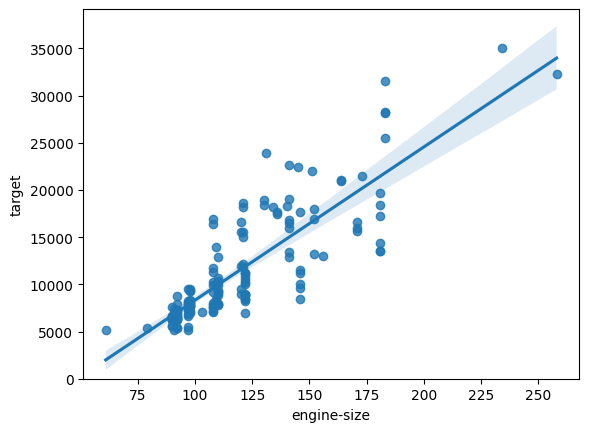

,engine-size,target
engine-size,1.000000,0.841496
target,0.841496,1.000000


In [27]:
import seaborn as sns

sns.regplot(x="engine-size", y="target", data=dataset )
plt.ylim(0,)
plt.show()
df[["engine-size", "target"]].corr()

#its a positive correlation 

In [32]:
# correlation matrix for engine size and target 
df[["engine-size", "target"]].corr()
# engine size is a fairly good predictor of target

,engine-size,target
engine-size,1.000000,0.841496
target,0.841496,1.000000


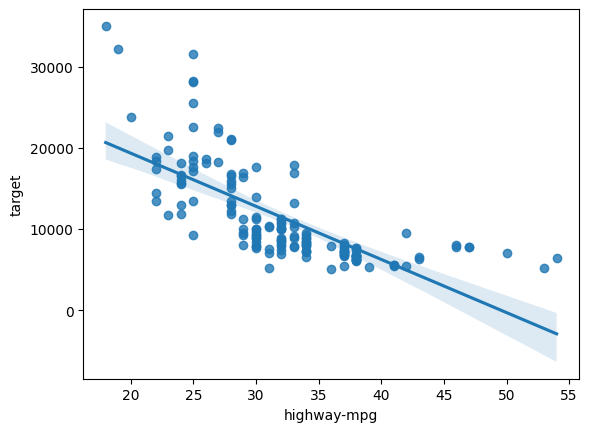

,highway-mpg,target
highway-mpg,1.00000,-0.72009
target,-0.72009,1.00000


In [26]:
#We can also look at the correation between highway mileage and price
sns.regplot(x="highway-mpg", y="target", data=df)
plt.show()
df[['highway-mpg', 'target']].corr()

#its a negative correlation 

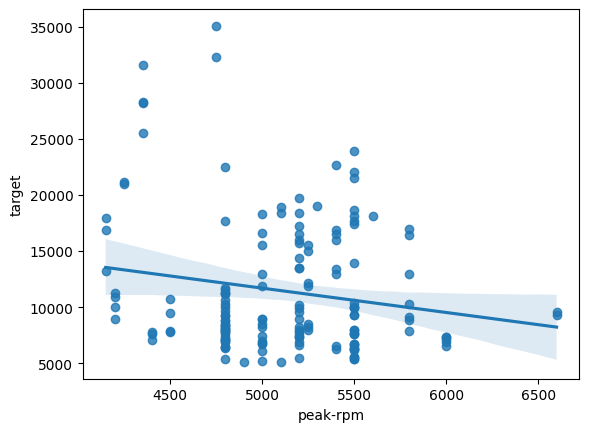

,peak-rpm,target
peak-rpm,1.000000,-0.171916
target,-0.171916,1.000000


In [28]:
# compare Peak RPM and target
sns.regplot(x="peak-rpm", y="target", data=dataset)
plt.show()
df[['peak-rpm','target']].corr()

# its a Weak Correlation
# its has a Weak linear relationship

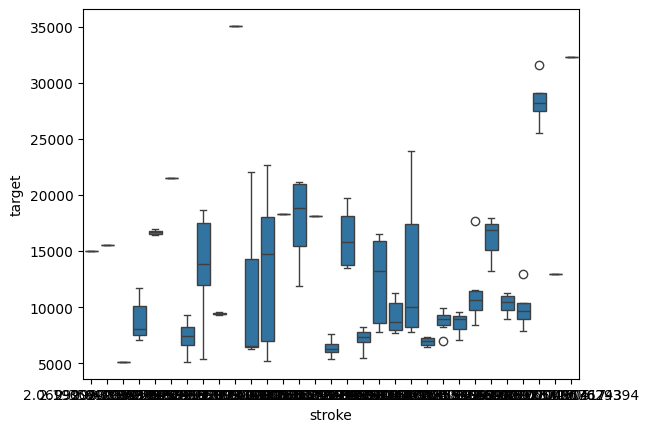

In [31]:
# relationships between stroke and price
sns.boxplot(x="stroke", y="target", data=dataset)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

X = dataset[['highway-mpg']]
Y = dataset['target']
lm = LinearRegression()
lm.fit(X,Y)


LinearRegression()

In [37]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

In [38]:
Yhat=lm.predict(X)
Yhat[0:5]

array([12809.86873425, 18052.11958005, 16086.27551287, 19362.6822915 ,
       13465.15008997])

In [39]:
lm_eq = 'yhat = ' + str(lm.intercept_) + ' + ' + str(lm.coef_[0]) + 'x'
print(lm_eq)

yhat = 32468.309406001994 + -655.2813557252141x


In [53]:
Z = dataset[['normalized-losses','length','width','height','bore','stroke','horsepower', 'curb-weight', 'engine-size','peak-rpm','city-mpg','highway-mpg']]
lm.fit(Z, dataset['target'])
print('intercept: ' + str(lm.intercept_), '\ncoefficients: ' + str(lm.coef_))

intercept: -67775.6239829888 
coefficients: [ 8.85892110e+00 -5.15073461e+01  9.72508565e+02  1.07662920e+02
 -1.63096122e+03 -1.40758143e+03  1.69455078e+01  6.23814115e+00
  4.70057075e+01  6.66009315e-01  1.07201454e+02 -4.58370952e+01]


In [54]:
Y_hat = lm.predict(Z)

/tmp/ipykernel_5778/939575604.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(dataset['target'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_5778/939575604.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color="b", label="Fitted V

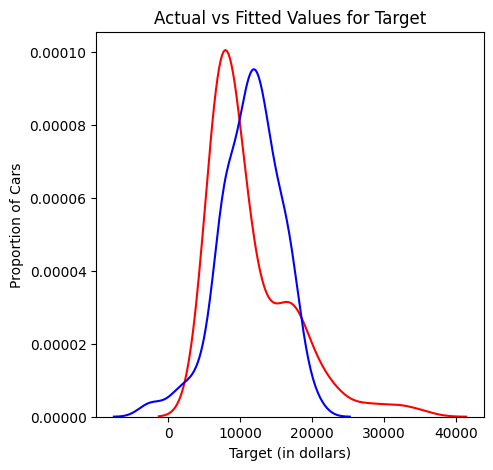

In [55]:
plt.figure(figsize=(5, 5))

ax1 = sns.distplot(dataset['target'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Target')
plt.xlabel('Target (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Inferences 

Stages
    1. Selecting models
        The models used here are Linear regression and Multiple linear Regression 
        where we can use the diffrent independent variables to compare and find 
        how it affects the target price
    2. Accuracy
        We can infer the accuracy based on the graph and their respective correlation for the MLR
        and for linear regression we can use MSE and R2 
    3. Interpretation
        the interpretaiton of the dataset given is that its based on different features of the car 
        and the target value is the rice with wich the car is sold 